# Create Thresholds Table
This notebook creates a table with the water contaminants and their thresholds according to the EWG (US) and the ECHA (EU).  
EWG: https://www.ewg.org/tapwater/all-ewg-standards.php  
ECHA: https://echa.europa.eu/quality-criteria-water

There is a unique code identifier (cas code) for each contaminant, in the case of the EWG table, it is not attached to it so I found a list of cas codes 
https://www.epa.gov/system/files/documents/2022-12/Microsoft%20Excel%20Version%20of%20EPCRA%20CERCLA%20CAA%20112(r)%20Consolidated%20List%20of%20Lists_December%202022.xlsx  
which is used to attach cas codes to the US threshold table

The EU contaminant is prioritized in case for a given contaminant, a limit exists for both continents.  

The output consists in a csv file containing the contaminants and their thresholds

In [1]:
import pandas as pd
import numpy as np
import re

import requests
from io import StringIO  
import matplotlib.pyplot as plt

# US Recommendations
https://www.ewg.org/tapwater/all-ewg-standards.php

In [2]:
# URL of the webpage containing the thresholds table
url = 'https://www.ewg.org/tapwater/all-ewg-standards.php'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

# Read all tables from the webpage
list = pd.read_html(StringIO(r.text)) # StringIO will be needed in future pandas versions

# take the dataframe
df = list[0]


# simplify the df
df = df.rename(columns={'Contaminant (in alphabetical order)':'contaminant'})
df['contaminant'] = df['contaminant'].str.lower()

df.head()


,contaminant,Environmental Protection Agency limit,EWG standard,Source of EWG standard,Contaminant’s health effects
0,"1,1-dichloroethane",Nonexistent,3 ppb,California public health goal,Cancer; change to the heart and blood vessels
1,"1,1,2-trichloroethane",5 ppb,0.3 ppb,California public health goal,Liver cancer; harm to the kidney; change to th...
2,"1,2-dibromo-3- chloropropane",0.2 ppb,0.0017 ppb,California public health goal,Testicular cancer; harm to the male reproducti...
3,"1,2-dichloroethane",5 ppb,0.4 ppb,California public health goal,Cancer; harm to the immune system; harm to the...
4,"1,2-dichloropropane",5 ppb,0.5 ppb,California public health goal,Liver cancer; harm to the liver; harm to the k...


In [3]:
# remove spaces in the contaminant names
df['contaminant'] = df['contaminant'].str.replace(' ', '')
df.head()

,contaminant,Environmental Protection Agency limit,EWG standard,Source of EWG standard,Contaminant’s health effects
0,"1,1-dichloroethane",Nonexistent,3 ppb,California public health goal,Cancer; change to the heart and blood vessels
1,"1,1,2-trichloroethane",5 ppb,0.3 ppb,California public health goal,Liver cancer; harm to the kidney; change to th...
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017 ppb,California public health goal,Testicular cancer; harm to the male reproducti...
3,"1,2-dichloroethane",5 ppb,0.4 ppb,California public health goal,Cancer; harm to the immune system; harm to the...
4,"1,2-dichloropropane",5 ppb,0.5 ppb,California public health goal,Liver cancer; harm to the liver; harm to the k...


In [4]:
# cas codes in excel file, downloaded from https://www.epa.gov/system/files/documents/2022-12/Microsoft%20Excel%20Version%20of%20EPCRA%20CERCLA%20CAA%20112(r)%20Consolidated%20List%20of%20Lists_December%202022.xlsx
cas_codes_df = pd.read_excel('../data/cas_codes.xlsx',skiprows=4)[['NAME','NAMEINDEX','CAS Sort Value','CAS/313 Category Codes']]
cas_codes_df['NAME'] = cas_codes_df['NAME'].str.lower()
cas_codes_df['NAMEINDEX'] = cas_codes_df['NAMEINDEX'].str.lower()
cas_codes_df.head()

,NAME,NAMEINDEX,CAS Sort Value,CAS/313 Category Codes
0,abamectin,abamectin avermectin b1,71751412.0,71751-41-2
1,acenaphthene,acenaphthene,83329.0,83-32-9
2,acenaphthylene,acenaphthylene,208968.0,208-96-8
3,acephate,acephate,30560191.0,30560-19-1
4,acetaldehyde,acetaldehyde,75070.0,75-07-0


In [5]:
# the names can be contaminated (hehe) with weird symbols and unnecessary text, clean it
def clean_contaminant_name(name):
    name = str(name).lower()
    name = re.sub(r'\(.*?\)', '', name)                   # remove anything in parentheses
    name = re.sub(r'[^a-zA-Z0-9,\-\s]', '', name)         # keep letters, digits, commas, hyphens, spaces
    name = re.sub(r'\s+', ' ', name).strip()              # normalize whitespace
    return name
df['contaminant'] = df['contaminant'].apply(clean_contaminant_name)
cas_codes_df['NAME'] = cas_codes_df['NAME'].apply(clean_contaminant_name)

In [6]:
# quick check if it contains some of the contaminants
contaminant_tmp = 'potassium'
matching_rows = cas_codes_df[cas_codes_df['NAME'].str.contains(contaminant_tmp, case=False, na=False)]
print('-----df1-----\n',matching_rows)
matching_rows = df[df['contaminant'].str.contains(contaminant_tmp, case=False, na=False)]
print('-----df2-----\n',matching_rows)

-----df1-----
                                    NAME                         NAMEINDEX  \
100         antimony potassium tartrate        antimonypotassium tartrate   
689               dipotassium endothall              dipotassiumendothall   
1340                 potassium arsenate                 potassiumarsenate   
1341                 potassium arsenite                 potassiumarsenite   
1342               potassium bichromate               potassiumbichromate   
1343                  potassium bromate                  potassiumbromate   
1344                 potassium chromate                 potassiumchromate   
1345                  potassium cyanide                  potassiumcyanide   
1346  potassium dimethyldithiocarbamate  potassiumdimethyldithiocarbamate   
1347                potassium hydroxide                potassiumhydroxide   
1348  potassium n-methyldithiocarbamate    potassiummethyldithiocarbamate   
1349             potassium permanganate             potassium

In [7]:
# join the dataframe with the thresholds with the one with the cas codes
merged = df.merge(cas_codes_df,how='left',left_on='contaminant',right_on='NAME')


In [8]:
merged.head()

,contaminant,Environmental Protection Agency limit,EWG standard,Source of EWG standard,Contaminant’s health effects,NAME,NAMEINDEX,CAS Sort Value,CAS/313 Category Codes
0,"1,1-dichloroethane",Nonexistent,3 ppb,California public health goal,Cancer; change to the heart and blood vessels,"1,1-dichloroethane",dichloroethane,75343.0,75-34-3
1,"1,1,2-trichloroethane",5 ppb,0.3 ppb,California public health goal,Liver cancer; harm to the kidney; change to th...,"1,1,2-trichloroethane",trichloroethaneb,79005.0,79-00-5
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017 ppb,California public health goal,Testicular cancer; harm to the male reproducti...,"1,2-dibromo-3-chloropropane",dibromochloro,96128.0,96-12-8
3,"1,2-dichloroethane",5 ppb,0.4 ppb,California public health goal,Cancer; harm to the immune system; harm to the...,"1,2-dichloroethane",dichloroethane,107062.0,107-06-2
4,"1,2-dichloropropane",5 ppb,0.5 ppb,California public health goal,Liver cancer; harm to the liver; harm to the k...,"1,2-dichloropropane",dichloropropane12,78875.0,78-87-5


In [9]:
# check which contaminants did not get a CAS value
merged['contaminant'][merged['CAS Sort Value'].isna()]

9                      p-dichlorobenzene
16                               benzene
19                               bromate
20                 bromochloroaceticacid
21               bromodichloroaceticacid
22                  bromodichloromethane
26                   carbontetrachloride
27                              chlorate
30               chlorodibromoaceticacid
31                              chlorite
37                               cyanide
38                             diadipate
39                           diphthalate
40                     dibromoaceticacid
41                  dibromochloromethane
42                    dichloroaceticacid
43                     p-dichlorobenzene
50                     ethylenedibromide
51                            glyphosate
52                       haloaceticacids
54                     heptachlorepoxide
57     hexafluoropropyleneoxidedimeracid
63                            molybdenum
64                   monobromoaceticacid
65              

In [10]:
# rename some columns
merged = merged.rename(columns={'EWG standard':'limit_us','Contaminant’s health effects':'notes','CAS/313 Category Codes':'cas_code'})


In [11]:
# convert to desired to g/L units
merged['limit_us'] = merged['limit_us'].str.replace("ppb","ug/L", regex = False) # Regex = False since pandas Series matches whole values, not substrings by default
merged['limit_us'] = merged['limit_us'].str.replace("ppm","mg/L", regex = False)
merged['limit_us'] = merged['limit_us'].str.replace("ppt","ng/L", regex = False)
merged['limit_us'] = merged['limit_us'].str.replace('µg/l', 'ug/L', regex=False)



In [12]:
merged

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code
0,"1,1-dichloroethane",Nonexistent,3 ug/L,California public health goal,Cancer; change to the heart and blood vessels,"1,1-dichloroethane",dichloroethane,75343.0,75-34-3
1,"1,1,2-trichloroethane",5 ppb,0.3 ug/L,California public health goal,Liver cancer; harm to the kidney; change to th...,"1,1,2-trichloroethane",trichloroethaneb,79005.0,79-00-5
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017 ug/L,California public health goal,Testicular cancer; harm to the male reproducti...,"1,2-dibromo-3-chloropropane",dibromochloro,96128.0,96-12-8
3,"1,2-dichloroethane",5 ppb,0.4 ug/L,California public health goal,Cancer; harm to the immune system; harm to the...,"1,2-dichloroethane",dichloroethane,107062.0,107-06-2
4,"1,2-dichloropropane",5 ppb,0.5 ug/L,California public health goal,Liver cancer; harm to the liver; harm to the k...,"1,2-dichloropropane",dichloropropane12,78875.0,78-87-5
...,...,...,...,...,...,...,...,...,...
109,tritium,Nonexistent,400 pCi/L,California public health goal,Cancer,NaN,NaN,NaN,NaN
110,uranium,30 ppb***,0.43 pCi/L,California public health goal,Cancer; harm to the kidney,NaN,NaN,NaN,NaN
111,vanadium,Nonexistent,21 ug/L,Health benchmark defined by the Environmental ...,Change in blood chemistry; harm to reproductio...,vanadium,vanadium,7440622.0,7440-62-2
112,vinylchloride,2 ppb,0.05 ug/L,California public health goal,Liver cancer; harm to the liver; change to the...,NaN,NaN,NaN,NaN


In [13]:
# Use regex to split the threshold into value and unit
merged["units_us"] = merged["limit_us"].str.extract(r'([a-zA-Zµ/]+)$')  # captures units
merged["limit_us"] = merged["limit_us"].str.extract(r'([\d.]+)')  # captures number

# Convert to Float
merged['limit_us'] = merged['limit_us'].astype(float)
merged

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code,units_us
0,"1,1-dichloroethane",Nonexistent,3.0000,California public health goal,Cancer; change to the heart and blood vessels,"1,1-dichloroethane",dichloroethane,75343.0,75-34-3,ug/L
1,"1,1,2-trichloroethane",5 ppb,0.3000,California public health goal,Liver cancer; harm to the kidney; change to th...,"1,1,2-trichloroethane",trichloroethaneb,79005.0,79-00-5,ug/L
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017,California public health goal,Testicular cancer; harm to the male reproducti...,"1,2-dibromo-3-chloropropane",dibromochloro,96128.0,96-12-8,ug/L
3,"1,2-dichloroethane",5 ppb,0.4000,California public health goal,Cancer; harm to the immune system; harm to the...,"1,2-dichloroethane",dichloroethane,107062.0,107-06-2,ug/L
4,"1,2-dichloropropane",5 ppb,0.5000,California public health goal,Liver cancer; harm to the liver; harm to the k...,"1,2-dichloropropane",dichloropropane12,78875.0,78-87-5,ug/L
...,...,...,...,...,...,...,...,...,...,...
109,tritium,Nonexistent,400.0000,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
110,uranium,30 ppb***,0.4300,California public health goal,Cancer; harm to the kidney,NaN,NaN,NaN,NaN,pCi/L
111,vanadium,Nonexistent,21.0000,Health benchmark defined by the Environmental ...,Change in blood chemistry; harm to reproductio...,vanadium,vanadium,7440622.0,7440-62-2,ug/L
112,vinylchloride,2 ppb,0.0500,California public health goal,Liver cancer; harm to the liver; change to the...,NaN,NaN,NaN,NaN,ug/L


In [14]:
def convert_units(df,limit_column_name, units_column_name):
    # Find rows with given unit
    mg_mask = df[units_column_name].str.lower() == "mg/l"
    ng_mask = df[units_column_name].str.lower() == "ng/l"

    # Convert those values
    df.loc[mg_mask, limit_column_name] *= 1000
    df.loc[ng_mask, limit_column_name] /= 1000

    # Update the units
    df.loc[mg_mask, units_column_name] = "µg/l"
    df.loc[ng_mask, units_column_name] = "µg/l"
    return df

# Update the units
merged = convert_units(merged,'limit_us','units_us')
merged

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code,units_us
0,"1,1-dichloroethane",Nonexistent,3.0000,California public health goal,Cancer; change to the heart and blood vessels,"1,1-dichloroethane",dichloroethane,75343.0,75-34-3,ug/L
1,"1,1,2-trichloroethane",5 ppb,0.3000,California public health goal,Liver cancer; harm to the kidney; change to th...,"1,1,2-trichloroethane",trichloroethaneb,79005.0,79-00-5,ug/L
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017,California public health goal,Testicular cancer; harm to the male reproducti...,"1,2-dibromo-3-chloropropane",dibromochloro,96128.0,96-12-8,ug/L
3,"1,2-dichloroethane",5 ppb,0.4000,California public health goal,Cancer; harm to the immune system; harm to the...,"1,2-dichloroethane",dichloroethane,107062.0,107-06-2,ug/L
4,"1,2-dichloropropane",5 ppb,0.5000,California public health goal,Liver cancer; harm to the liver; harm to the k...,"1,2-dichloropropane",dichloropropane12,78875.0,78-87-5,ug/L
...,...,...,...,...,...,...,...,...,...,...
109,tritium,Nonexistent,400.0000,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
110,uranium,30 ppb***,0.4300,California public health goal,Cancer; harm to the kidney,NaN,NaN,NaN,NaN,pCi/L
111,vanadium,Nonexistent,21.0000,Health benchmark defined by the Environmental ...,Change in blood chemistry; harm to reproductio...,vanadium,vanadium,7440622.0,7440-62-2,ug/L
112,vinylchloride,2 ppb,0.0500,California public health goal,Liver cancer; harm to the liver; change to the...,NaN,NaN,NaN,NaN,ug/L


In [15]:
# make sure all the limits are numbers
print(merged['limit_us'].unique())
# check also the units
print(merged['units_us'].unique())
merged['units_us'] = merged['units_us'].str.replace('µg/l', 'ug/L', regex=False)
print(merged['units_us'].unique())



[3.00e+00 3.00e-01 1.70e-03 4.00e-01 5.00e-01 7.00e-04 5.00e+00 1.03e-02
 3.50e-01 6.00e+00 2.00e+01 6.00e+02 1.00e+00 4.00e-03 1.00e-01 7.00e+02
 1.50e-01 7.00e-03 2.00e-02 4.00e-02 6.00e-02 7.00e-01 2.10e+02 3.00e-02
 5.00e+01 2.69e+00 7.00e+01 3.00e+02 1.50e+02 2.00e+02 2.00e-01 4.00e+00
 9.40e+01 1.00e-02 8.00e-03 6.00e-03 2.00e+00 9.00e-03 3.20e-02 1.00e+02
 1.20e+00 9.00e-02 4.00e+01 2.50e+01 5.30e+01 1.30e+01 3.00e-03 1.40e+02
 2.60e+01 6.00e-06 1.00e-06 3.00e-04 9.00e-05 1.66e+02 5.00e-02 1.90e-02
 3.00e+01 1.50e+03 1.30e+03 4.00e+03 4.00e+02 4.30e-01 2.10e+01 1.80e+03]
['ug/L' 'µg/l' 'pCi/L']
['ug/L' 'pCi/L']


In [16]:
merged['units_us'].dropna().unique()

array(['ug/L', 'pCi/L'], dtype=object)

In [17]:
merged[merged['contaminant'].str.contains('radium')]

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code,units_us
92,radium-226,5 pCi/L for combined radium-226 and radium-228,0.050,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
93,radium-228,5 pCi/L for combined radium-226 and radium-228,0.019,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L


In [18]:
# check if there's any weird value or units I should change
print(merged['limit_us'].unique())

[3.00e+00 3.00e-01 1.70e-03 4.00e-01 5.00e-01 7.00e-04 5.00e+00 1.03e-02
 3.50e-01 6.00e+00 2.00e+01 6.00e+02 1.00e+00 4.00e-03 1.00e-01 7.00e+02
 1.50e-01 7.00e-03 2.00e-02 4.00e-02 6.00e-02 7.00e-01 2.10e+02 3.00e-02
 5.00e+01 2.69e+00 7.00e+01 3.00e+02 1.50e+02 2.00e+02 2.00e-01 4.00e+00
 9.40e+01 1.00e-02 8.00e-03 6.00e-03 2.00e+00 9.00e-03 3.20e-02 1.00e+02
 1.20e+00 9.00e-02 4.00e+01 2.50e+01 5.30e+01 1.30e+01 3.00e-03 1.40e+02
 2.60e+01 6.00e-06 1.00e-06 3.00e-04 9.00e-05 1.66e+02 5.00e-02 1.90e-02
 3.00e+01 1.50e+03 1.30e+03 4.00e+03 4.00e+02 4.30e-01 2.10e+01 1.80e+03]


In [19]:
# check for a given unit, e.g. pCi/L
merged[merged['units_us'].str.contains('pCi/L',case=False).fillna(False)]

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code,units_us
92,radium-226,5 pCi/L for combined radium-226 and radium-228,0.050,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
93,radium-228,5 pCi/L for combined radium-226 and radium-228,0.019,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
97,strontium-90,Nonexistent,0.350,California public health goal,Cancer; harm to bones,NaN,NaN,NaN,NaN,pCi/L
109,tritium,Nonexistent,400.000,California public health goal,Cancer,NaN,NaN,NaN,NaN,pCi/L
110,uranium,30 ppb***,0.430,California public health goal,Cancer; harm to the kidney,NaN,NaN,NaN,NaN,pCi/L


In [20]:
merged.head()

,contaminant,Environmental Protection Agency limit,limit_us,Source of EWG standard,notes,NAME,NAMEINDEX,CAS Sort Value,cas_code,units_us
0,"1,1-dichloroethane",Nonexistent,3.0000,California public health goal,Cancer; change to the heart and blood vessels,"1,1-dichloroethane",dichloroethane,75343.0,75-34-3,ug/L
1,"1,1,2-trichloroethane",5 ppb,0.3000,California public health goal,Liver cancer; harm to the kidney; change to th...,"1,1,2-trichloroethane",trichloroethaneb,79005.0,79-00-5,ug/L
2,"1,2-dibromo-3-chloropropane",0.2 ppb,0.0017,California public health goal,Testicular cancer; harm to the male reproducti...,"1,2-dibromo-3-chloropropane",dibromochloro,96128.0,96-12-8,ug/L
3,"1,2-dichloroethane",5 ppb,0.4000,California public health goal,Cancer; harm to the immune system; harm to the...,"1,2-dichloroethane",dichloroethane,107062.0,107-06-2,ug/L
4,"1,2-dichloropropane",5 ppb,0.5000,California public health goal,Liver cancer; harm to the liver; harm to the k...,"1,2-dichloropropane",dichloropropane12,78875.0,78-87-5,ug/L


In [21]:
# create a column with the continent, to keep track of the df, will be useful later when we merge with eu df
merged['continent_us'] = 'us' 

In [22]:
# save to csv
merged[['contaminant','cas_code','limit_us','units_us','notes','continent_us']].to_csv('../data/contaminant_thresholds.csv',index=False)

## Now the European recommendations
https://echa.europa.eu/quality-criteria-water

In [23]:
# Adjust this to the number of lines before the actual header starts
eu_df = pd.read_csv(
    "../data/water-for-human-consumption-directive---quality-criteria-export.csv",
    sep="\t", # tabular separation
    skiprows=10,  # Skip metadata and junk rows
    engine="python"  # Use Python engine to avoid tokenizer errors
)
eu_df.head()

,Name,EC No.,CAS No.,Name.1,CAS,Application Name,English Name in Source,Expressed As,Maximum Threshold,Minimum Threshold,Note(s),Notes,Part,Qualifier(s),Restriction(s),Unit,Unnamed: 16
0,"1,2-dichloroethane",203-458-1,107-06-2,"1,2-dichloroethane",107-06-2,Drinking water,NaN,NaN,3 µg/l,NaN,NaN,NaN,B Part B - Chemical parameters,NaN,NaN,NaN,NaN
1,Acrylamide,201-173-7,79-06-1,Acrylamide,79-06-1,Drinking water,NaN,NaN,0.1 µg/l,NaN,NaN,The parametric value refers to the residual mo...,B Part B - Chemical parameters,NaN,NaN,NaN,NaN
2,Aluminium,231-072-3,7429-90-5,Aluminium,7429-90-5,Drinking water,NaN,NaN,200 µg/l,NaN,NaN,NaN,C1 Part C - Indicator parameters,NaN,NaN,NaN,NaN
3,Ammonium,-,14798-03-9,Ammonium,14798-03-9,Drinking water,NaN,NaN,0.5 mg/l,NaN,NaN,NaN,C1 Part C - Indicator parameters,NaN,NaN,NaN,NaN
4,Antimony,231-146-5,7440-36-0,Antimony,7440-36-0,Drinking water,NaN,NaN,5 µg/l,NaN,NaN,NaN,B Part B - Chemical parameters,NaN,NaN,NaN,NaN


In [24]:
# create a column with the continent, will be useful later when we merge with us one
eu_df['continent_eu'] = 'eu'
eu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    52 non-null     object 
 1   EC No.                  52 non-null     object 
 2   CAS No.                 52 non-null     object 
 3   Name.1                  52 non-null     object 
 4   CAS                     29 non-null     object 
 5   Application Name        52 non-null     object 
 6   English Name in Source  0 non-null      float64
 7   Expressed As            2 non-null      object 
 8   Maximum Threshold       52 non-null     object 
 9   Minimum Threshold       1 non-null      object 
 10  Note(s)                 0 non-null      float64
 11  Notes                   21 non-null     object 
 12  Part                    52 non-null     object 
 13  Qualifier(s)            2 non-null      object 
 14  Restriction(s)          14 non-null     obje

In [25]:
# lower case the contaminant names
eu_df['Name'] = eu_df['Name'].str.lower()
# remove unnecessary columns
eu_df = eu_df.drop(['Name.1','Application Name','English Name in Source','Expressed As', 'Minimum Threshold', 'Note(s)','Notes','Part','Qualifier(s)','Restriction(s)','Unit','Unnamed: 16'], axis=1)

In [26]:
# Use regex to split into value and unit
eu_df["units_eu"] = eu_df["Maximum Threshold"].str.extract(r'([a-zA-Zµ/]+)$')  # captures units
eu_df["Maximum Threshold"] = eu_df["Maximum Threshold"].str.extract(r'([\d.]+)')  # captures number

# Convert to Float
eu_df["Maximum Threshold"] = eu_df["Maximum Threshold"].astype(float)

In [27]:
# # Find rows with mg/l
# mg_mask = eu_df["units_eu"].str.lower() == "mg/l"

# # Convert those values
# eu_df.loc[mg_mask, "Maximum Threshold"] *= 1000

# # Update the units
# eu_df.loc[mg_mask, "units_eu"] = "µg/l"

# Update the units
eu_df = convert_units(eu_df,'Maximum Threshold','units_eu')

In [28]:
eu_df.head()

,Name,EC No.,CAS No.,CAS,Maximum Threshold,continent_eu,units_eu
0,"1,2-dichloroethane",203-458-1,107-06-2,107-06-2,3.0,eu,µg/l
1,acrylamide,201-173-7,79-06-1,79-06-1,0.1,eu,µg/l
2,aluminium,231-072-3,7429-90-5,7429-90-5,200.0,eu,µg/l
3,ammonium,-,14798-03-9,14798-03-9,500.0,eu,µg/l
4,antimony,231-146-5,7440-36-0,7440-36-0,5.0,eu,µg/l


In [29]:
print(eu_df['units_eu'].unique())
eu_df['units_eu'] = eu_df['units_eu'].str.replace('µg/l', 'ug/L', regex=False)
eu_df['units_eu'] = eu_df['units_eu'].str.replace('µS/cm', 'uS/L', regex=False)

print(eu_df['units_eu'].unique())

['µg/l' 'ml' 'count/ml' nan 'µS/cm' 'units' 'mSv/year' 'Bq/l']
['ug/L' 'ml' 'count/ml' nan 'uS/L' 'units' 'mSv/year' 'Bq/l']


In [30]:
eu_df.head()

,Name,EC No.,CAS No.,CAS,Maximum Threshold,continent_eu,units_eu
0,"1,2-dichloroethane",203-458-1,107-06-2,107-06-2,3.0,eu,ug/L
1,acrylamide,201-173-7,79-06-1,79-06-1,0.1,eu,ug/L
2,aluminium,231-072-3,7429-90-5,7429-90-5,200.0,eu,ug/L
3,ammonium,-,14798-03-9,14798-03-9,500.0,eu,ug/L
4,antimony,231-146-5,7440-36-0,7440-36-0,5.0,eu,ug/L


### Get the US limits that from the df we saved and compare them with the EU ones

In [31]:
# take the file with us US thresholds
us_df = pd.read_csv('../data/contaminant_thresholds.csv')
us_df.head()

,contaminant,cas_code,limit_us,units_us,notes,continent_us
0,"1,1-dichloroethane",75-34-3,3.0000,ug/L,Cancer; change to the heart and blood vessels,us
1,"1,1,2-trichloroethane",79-00-5,0.3000,ug/L,Liver cancer; harm to the kidney; change to th...,us
2,"1,2-dibromo-3-chloropropane",96-12-8,0.0017,ug/L,Testicular cancer; harm to the male reproducti...,us
3,"1,2-dichloroethane",107-06-2,0.4000,ug/L,Cancer; harm to the immune system; harm to the...,us
4,"1,2-dichloropropane",78-87-5,0.5000,ug/L,Liver cancer; harm to the liver; harm to the k...,us


In [32]:
print(us_df[us_df['contaminant'].str.contains('trit',case=False)])
print(us_df[us_df['cas_code'].str.contains('75-01-4',case=False,na=False)])

    contaminant cas_code  limit_us units_us   notes continent_us
109     tritium      NaN     400.0    pCi/L  Cancer           us
Empty DataFrame
Columns: [contaminant, cas_code, limit_us, units_us, notes, continent_us]
Index: []


In [33]:
# hand-changing some values to match them with US names
eu_df['Name'] = eu_df['Name'].replace('aluminium','aluminum')
eu_df['Name'] = eu_df['Name'].replace('benzo(a)pyrene','benzoapyrene')

In [34]:
# FIXME: actually it is named 'nitrites' should I add the concentrations of all the nitrites? or just take the nitrite...
# in the thresholds nitrite is listed as 'nitrites' change the name and cas_code
# Since the cas code is not specified in the ECHA webpage, we will not add it
# nitrite_code = '14797-65-0'
mask_tmp = eu_df['Name'] == 'nitrites'
#world_data.loc[mask_tmp, ['contaminant','cas_code']] = ['nitrite', nitrite_code]
eu_df.loc[mask_tmp, ['Name']] = 'nitrite'


# For Nitrates, the ECHA indeed provides the cas_code, and it matches with the one from nitrate, so let's take it
#nitrite_code = '14797-55-8'
mask_tmp = eu_df['Name'] == 'nitrates'
eu_df.loc[mask_tmp, ['Name']] = 'nitrate'

In [35]:
# check the contaminants that are only present en eu and not us
only_in_eu = eu_df[~eu_df["Name"].isin(us_df["contaminant"])]
only_in_eu

,Name,EC No.,CAS No.,CAS,Maximum Threshold,continent_eu,units_eu
1,acrylamide,201-173-7,79-06-1,79-06-1,0.10,eu,ug/L
3,ammonium,-,14798-03-9,14798-03-9,500.00,eu,ug/L
8,boron,231-151-2,7440-42-8,7440-42-8,1000.00,eu,ug/L
11,chloride,690-375-2,16887-00-6,16887-00-6,250000.00,eu,ug/L
13,clostridium perfringens (including spores),-,-,NaN,0.00,eu,ml
14,coliform bacteria,-,-,NaN,0.00,eu,ml
15,coliform bacteria,-,-,NaN,0.00,eu,ml
16,colony count at 22°c;colony count at 37°c,-,-,NaN,100.00,eu,count/ml
17,colony count at 22°c;colony count at 37°c,-,-,NaN,100.00,eu,NaN
18,colony count at 22°c;colony count at 37°c,-,-,NaN,20.00,eu,count/ml


In [36]:
# merge EU and US contaminants, keeping all the non-matching contaminants from both df's
world_df = pd.merge(us_df, eu_df, left_on='contaminant', right_on='Name', how='outer')

In [37]:
world_df.head()
world_df = world_df.rename(columns={'Maximum Threshold':'limit_eu'})
world_df

,contaminant,cas_code,limit_us,units_us,notes,continent_us,Name,EC No.,CAS No.,CAS,limit_eu,continent_eu,units_eu
0,"1,1,2-trichloroethane",79-00-5,0.3000,ug/L,Liver cancer; harm to the kidney; change to th...,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,1-dichloroethane",75-34-3,3.0000,ug/L,Cancer; change to the heart and blood vessels,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,2,3-trichloropropane",96-18-4,0.0007,ug/L,Cancer,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1,2,4-trichlorobenzene",120-82-1,5.0000,ug/L,Harm to the adrenal gland; cancer,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1,2-dibromo-3-chloropropane",96-12-8,0.0017,ug/L,Testicular cancer; harm to the male reproducti...,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,uranium,NaN,0.4300,pCi/L,Cancer; harm to the kidney,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,vanadium,7440-62-2,21.0000,ug/L,Change in blood chemistry; harm to reproductio...,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,vinyl chloride,200-831-0,75-01-4,75-01-4,0.5,eu,ug/L
147,vinylchloride,NaN,0.0500,ug/L,Liver cancer; harm to the liver; change to the...,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Now combine the thresholds, if the EU threshold exists, keep the EU one, if not, take the US one
world_df['limit_combined'] = world_df['limit_eu'].combine_first(world_df['limit_us'])
world_df['units_combined'] = world_df['units_eu'].combine_first(world_df['units_us'])
world_df['cas_code_combined'] = world_df['CAS'].combine_first(world_df['cas_code'])
world_df['contaminant_combined'] = world_df['Name'].combine_first(world_df['contaminant'])
world_df['continent'] = world_df['continent_eu'].combine_first(world_df['continent_us'])

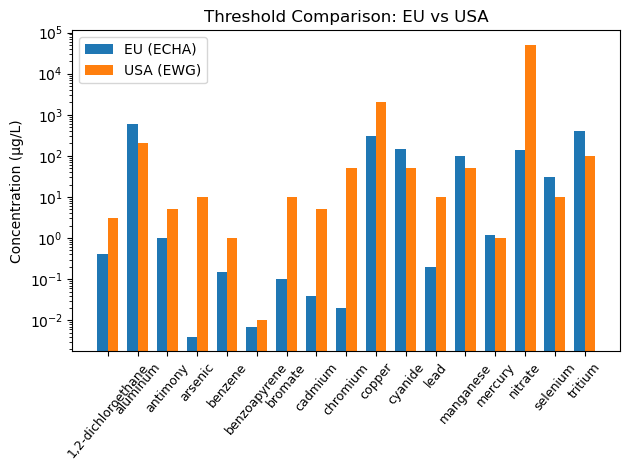

In [39]:
# Plot EU and US contaminants and their thresholds
shared_contaminants = world_df.dropna(subset=['limit_eu','limit_us'])
x = np.arange(len(shared_contaminants["contaminant"]))  # X axis positions
width = 0.35  # Width of each bar

fig, ax = plt.subplots()

# Plot both versions side-by-side
bars1 = ax.bar(x - width/2, shared_contaminants["limit_us"], width, label='EU (ECHA)')
bars2 = ax.bar(x + width/2, shared_contaminants["limit_eu"], width, label='USA (EWG)')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(shared_contaminants["contaminant"])

# Labels and title
ax.set_ylabel('Concentration (µg/L)')
ax.set_title('Threshold Comparison: EU vs USA')
ax.legend()

ax.set_yscale('log')

plt.xticks(rotation=50, fontsize = 9)
plt.tight_layout()
plt.show()

In [40]:
# take the columns we are interested in
world_data = world_df[['contaminant_combined','cas_code_combined','limit_combined','units_combined','continent','notes']]
world_data = world_data.rename(columns={'contaminant_combined':'contaminant','cas_code_combined':'cas_code','limit_combined':'limit','units_combined':'units'})
world_data.head(10)

,contaminant,cas_code,limit,units,continent,notes
0,"1,1,2-trichloroethane",79-00-5,0.3000,ug/L,us,Liver cancer; harm to the kidney; change to th...
1,"1,1-dichloroethane",75-34-3,3.0000,ug/L,us,Cancer; change to the heart and blood vessels
2,"1,2,3-trichloropropane",96-18-4,0.0007,ug/L,us,Cancer
3,"1,2,4-trichlorobenzene",120-82-1,5.0000,ug/L,us,Harm to the adrenal gland; cancer
4,"1,2-dibromo-3-chloropropane",96-12-8,0.0017,ug/L,us,Testicular cancer; harm to the male reproducti...
5,"1,2-dichloroethane",107-06-2,3.0000,ug/L,eu,Cancer; harm to the immune system; harm to the...
6,"1,2-dichloropropane",78-87-5,0.5000,ug/L,us,Liver cancer; harm to the liver; harm to the k...
7,"1,3-butadiene",106-99-0,0.0103,ug/L,us,Cancer; harm to the brain and nervous system; ...
8,"1,4-dioxane",123-91-1,0.3500,ug/L,us,Cancer; irritation of the lungs; harm to the k...
9,"2,4-d",94-75-7,20.0000,ug/L,us,Hormone disruption; harm to the liver; harm to...


In [41]:
# check for a given contaminant
world_data[world_data['contaminant'].str.contains("Nitr",case=False)]
# Some compounds that I should add
# Nitrite
# Phenanthrene

,contaminant,cas_code,limit,units,continent,notes
87,n-nitrosodimethylamine,62-75-9,0.003,ug/L,us,Cancer
89,nitrate,14797-55-8,50000.000,ug/L,eu,Cancer; harm to fetal growth and child develop...
90,nitrite,NaN,500.000,ug/L,eu,NaN


In [42]:
world_data.to_csv('../data/world_contaminant_thresholds.csv',index=False)